In [1]:
using Reactive, Interact

In [2]:
using PyPlot

In [3]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [4]:
require("scripts/BP.jl")

In [5]:
#reload("scripts/BP")

In [6]:
δpmp(n₀::Int,m₀::Int) = BP.δpmp(45; n0=n₀, m0=m₀)

δpmp (generic function with 1 method)

In [7]:
const P = δpmp(5,5);

In [9]:
const ν = linspace(-3.2,-2.6,100);

In [10]:
sp = BP.Spectrum(ν,P);

In [11]:
sω = slider(ν[1]:0.01:ν[end], label="ω")

Slider{Float64}([Input{Float64}] -2.9,"ω",-2.9,-3.2:0.01:-2.6)

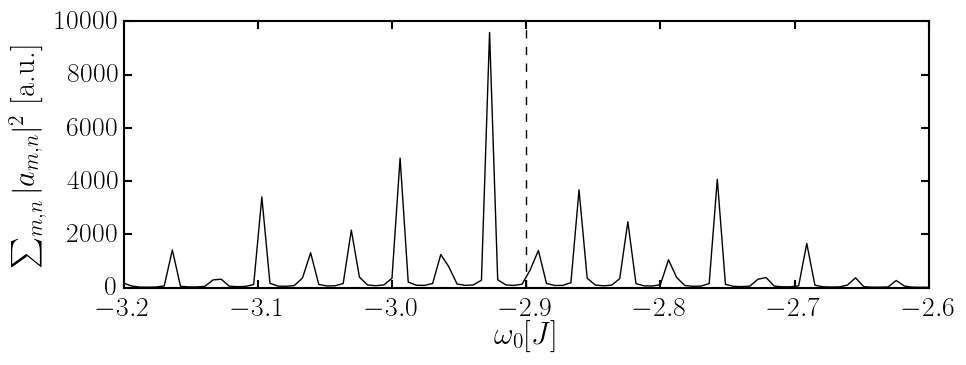

In [12]:
#plot spectrum
f1, ax1 = plt.subplots(figsize=(10, 4))
lift(ω -> withfig(()->begin
    ax1[:cla]()
    ax1[:plot](sp.νs,sp.intensity,"k") 
    ax1[:axvline](x=ω,color="k",ls="dashed")
    ax1[:set_xlim](sp.νs[1],sp.νs[end])
    ax1[:set_xlabel](L"$\omega_0 [J]$")
    ax1[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")
    end,f1,clear=false), sω)

In [13]:
#full plot range, both in x and y
const xm = [-div(sp.N-1,2):div(sp.N-1,2)]

#zoom in :)
const edge = 10
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

s.νs[i] => -2.8969696969696974


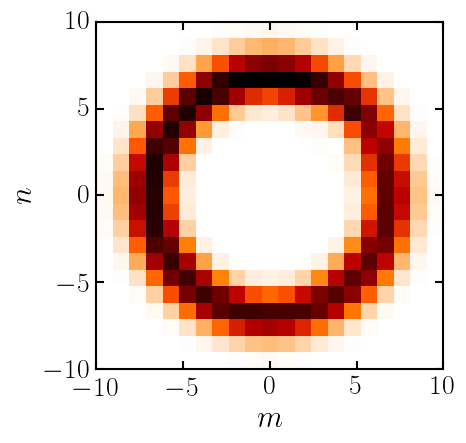

In [14]:
#plot w.f. in real space
f2, ax2 = plt.subplots(figsize=(5, 5))
lift(ω -> withfig(()->begin
    ax2[:cla]()
    ax2[:imshow](abs2(reshape(BP.getstate(sp, ω).ψ, sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    ax2[:set_xlabel](L"$m$")
    ax2[:set_ylabel](L"$n$")    
    end,f2,clear=false), sω)

In [15]:
## k = linspace(-π, π, 200)
## Xk = myfft2(X, k,k)
## abs(), angle()